### Predicting if a person would buy life insurnace based on his age using logistic regression

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [308]:
df= pd.read_csv(r"C:\Users\evilk\Downloads\insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


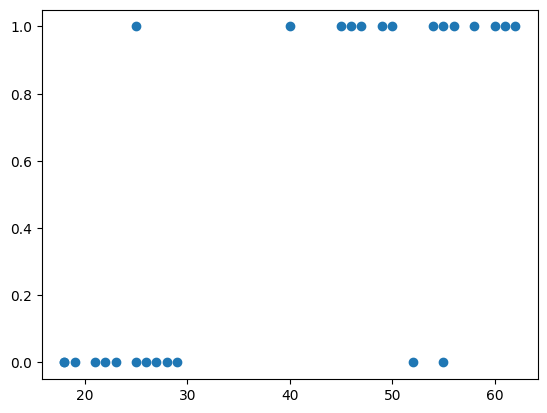

In [309]:
plt.scatter(x='age',y='bought_insurance',data=df)
plt.show()

In [310]:
from sklearn.model_selection import train_test_split


In [311]:
x_train,x_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,test_size=0.3)

In [312]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [313]:
x_train

,age
21,26
0,22
9,61
7,60
1,25
2,47
16,25
17,58
13,29
4,46


In [314]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


In [315]:
model.fit(x_train,y_train)

LogisticRegression()

In [316]:
print(x_test)
model.predict(x_test)

    age
26   23
3    52
10   18
22   40
23   45
20   21
14   49
15   55
24   50


array([0, 1, 0, 1, 1, 0, 1, 1, 1])

In [317]:
y_test

26    0
3     0
10    0
22    1
23    1
20    0
14    1
15    1
24    1
Name: bought_insurance, dtype: int64

In [318]:
model.score(x_train,y_train)

0.8888888888888888

In [319]:
model.score(x_test,y_test)

0.8888888888888888

In [320]:
model.predict([[39]])

c:\Users\evilk\OneDrive\Desktop\ML\myvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

### Excercise 4

    Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
    Plot bar charts showing impact of employee salaries on retention
    Plot bar charts showing corelation between department and employee retention
    Now build logistic regression model using variables that were narrowed down in step 1
    Measure the accuracy of the model


In [321]:
emp =pd.read_csv(r"C:\Users\evilk\Downloads\HR_comma_sep.csv")
emp.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [322]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [323]:
left=emp[emp.left==1]
left.shape

(3571, 10)

In [324]:
retained=emp[emp.left==0]
retained.shape

(11428, 10)

<Axes: xlabel='salary'>

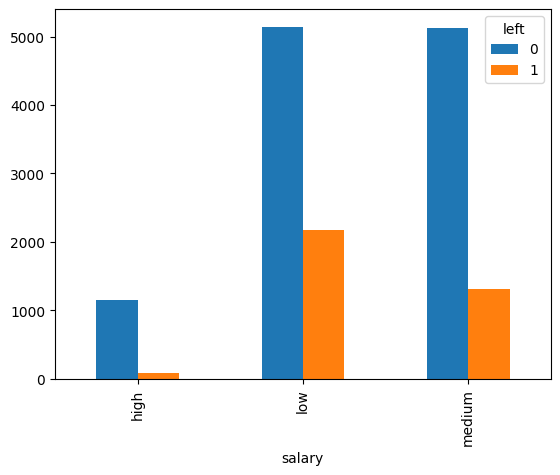

In [325]:
pd.crosstab(emp['salary'],emp['left']).plot(kind='bar')

<Axes: xlabel='Department'>

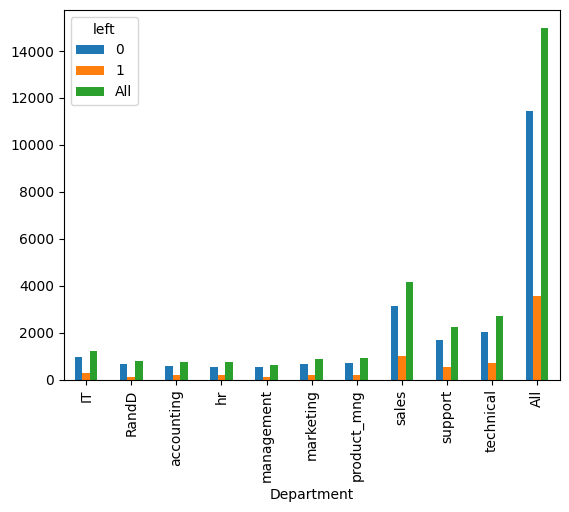

In [326]:
pd.crosstab(emp['Department'],emp['left'],margins=True).plot(kind='bar')

In [327]:
dummies=pd.get_dummies(emp['salary'],dtype=int)
dummies=pd.concat([emp,dummies],axis=1)
dummies=dummies.drop(['salary'],axis='columns')


In [328]:

final=dummies.drop(['high'],axis=1)
final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,1,0


In [329]:
x=final.drop(['left','Department'],axis=1)
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
0,0.38,0.53,2,157,3,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0


In [330]:
y=final['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [331]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [332]:
x_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
10233,0.72,0.67,5,210,2,0,0,0,1
1350,0.84,0.89,4,245,5,1,0,0,1
4218,0.89,0.68,4,258,2,1,0,1,0
5111,0.52,1.00,4,148,3,0,0,0,1
8155,0.75,0.81,3,214,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...
10171,0.55,0.48,4,271,6,1,0,0,0
2704,0.63,0.50,5,246,2,0,0,1,0
3853,0.74,0.77,3,233,3,0,0,1,0
14885,0.45,0.53,2,159,3,0,0,1,0


In [333]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [334]:
model.fit(x,y)

c:\Users\evilk\OneDrive\Desktop\ML\myvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [335]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(4500,))

In [336]:
model.score(x_test,y_test)

0.798

In [337]:
model.score(x_train,y_train)

0.7930279074197543